In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [35]:
df = pd.read_csv("C:/Users/kiran/OneDrive/Desktop/winequality-red.csv")

Understanding Data
Next, I wanted to get a better idea of what I was working with.


In [36]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Initial visual analysis

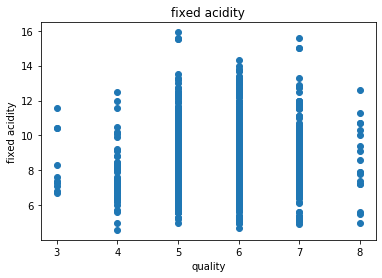

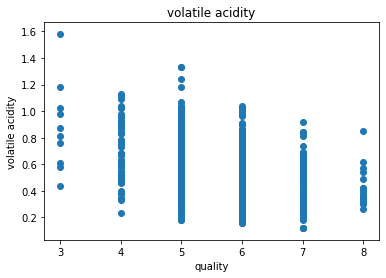

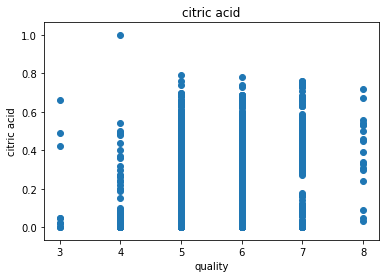

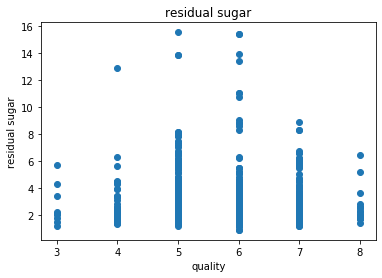

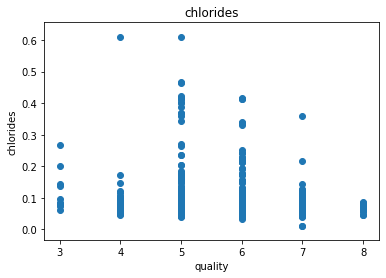

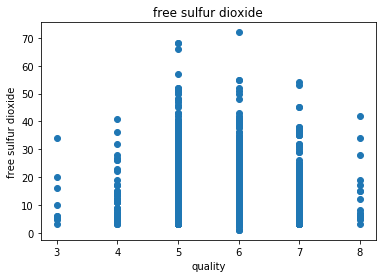

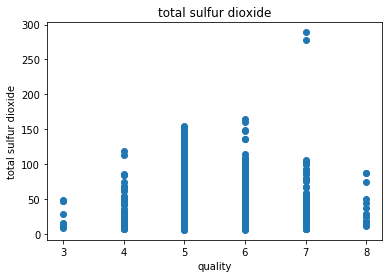

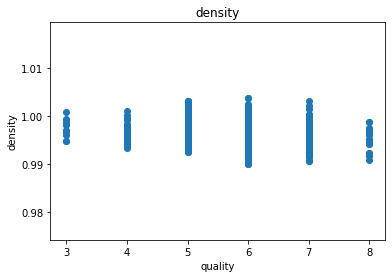

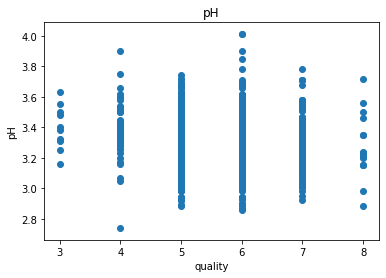

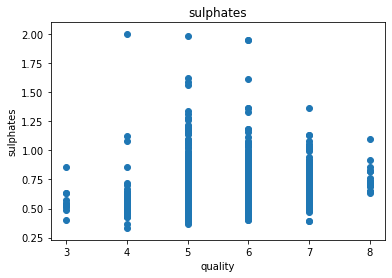

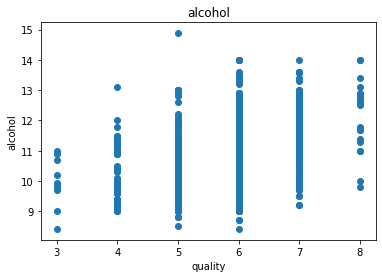

In [39]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()


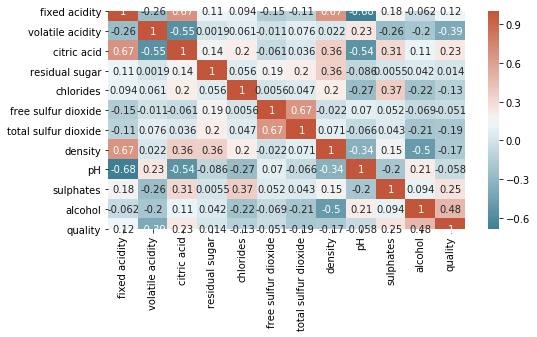

In [43]:
corr = df.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Gathering the training and testing data

In [45]:


bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [47]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [48]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [49]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       663
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      174
Name: quality, dtype: int64


### K Nearest Neighbors Classifier

In [50]:


n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       141
           1       0.69      0.72      0.71       174
           2       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.67      0.68      0.67       320



In [51]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       141
           1       0.70      0.77      0.73       174
           2       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.68      0.69      0.68       320



C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74       141
           1       0.79      0.74      0.76       174
           2       0.00      0.00      0.00         5

    accuracy                           0.75       320
   macro avg       0.50      0.51      0.50       320
weighted avg       0.74      0.75      0.74       320



C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       141
           1       0.74      0.73      0.73       174
           2       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.48      0.48      0.48       320
weighted avg       0.71      0.71      0.71       320



### SGDClassifier

In [55]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       141
           1       0.74      0.61      0.67       174
           2       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.46      0.45      0.45       320
weighted avg       0.68      0.65      0.66       320



### Trying to improve results

In [56]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   1.0s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   0.9s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=98, bootstrap=False, total=   2.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.6s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   1.5s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   2.3s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   1.6s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, mi

[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.0s
[CV] n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_s

[CV]  n_estimators=788, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   0.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   0.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   0.8s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_sam

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False, total=   0.6s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366,

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.2s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.6s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_

[CV]  n_estimators=261, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=32, bootstrap=True, total=   0.4s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   2.2s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   1.5s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   2.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=1000, min_samp

[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   1.7s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   1.2s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   2.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, mi

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.9min finished


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       141
           1       0.80      0.79      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.52       320
weighted avg       0.77      0.78      0.77       320



In [57]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       141
           1       0.80      0.79      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.52       320
weighted avg       0.77      0.78      0.77       320

{'n_estimators': 788, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 32, 'bootstrap': True}
